Saving diabetic_prediction_dataset_v2.csv to diabetic_prediction_dataset_v2 (3).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diabetes_Status          1000 non-null   int64  
 1   Diet_Quality             1000 non-null   object 
 2   Physical_Activity_Level  1000 non-null   object 
 3   Smoking_Status           1000 non-null   object 
 4   Family_History           1000 non-null   object 
 5   Glucose_Level            1000 non-null   float64
 6   Insulin_Level            1000 non-null   float64
 7   BMI                      1000 non-null   float64
 8   Age                      1000 non-null   int64  
 9   HbA1c                    1000 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 78.3+ KB

Missing Values:
Diabetes_Status            0
Diet_Quality               0
Physical_Activity_Level 

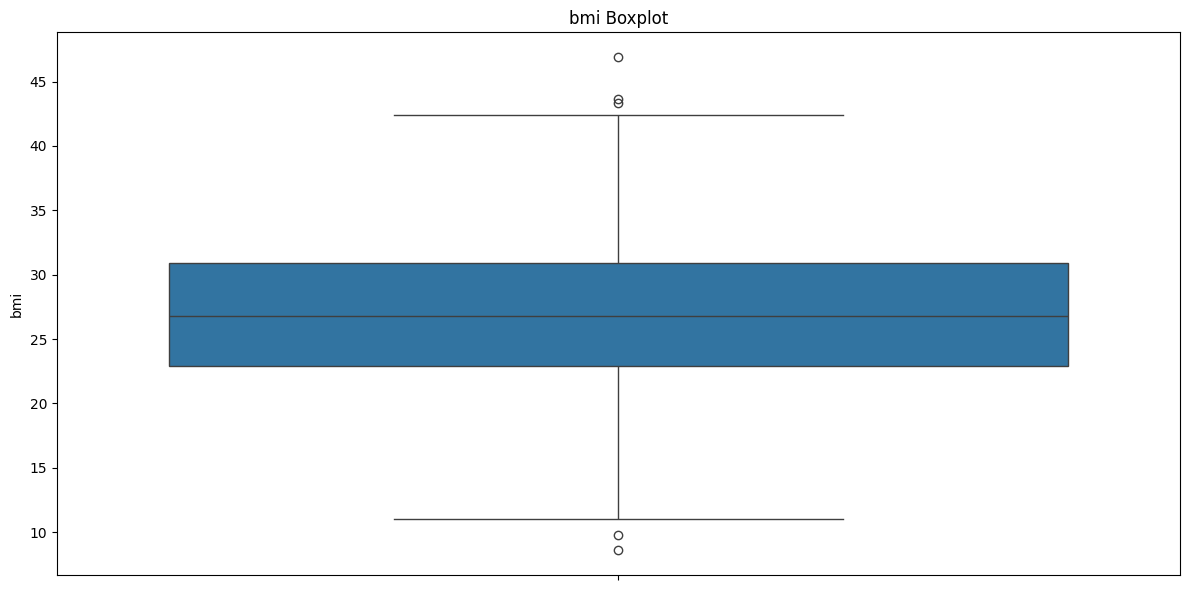

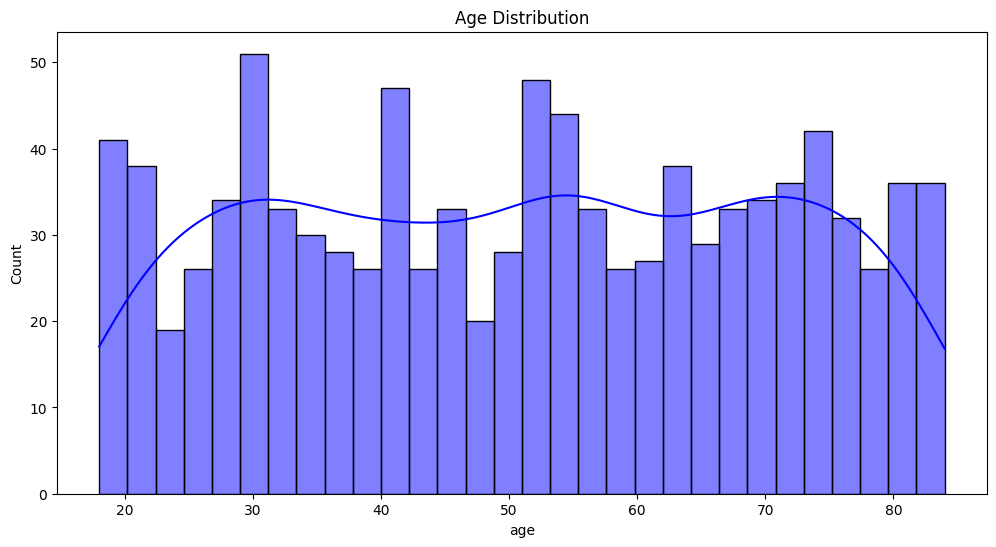

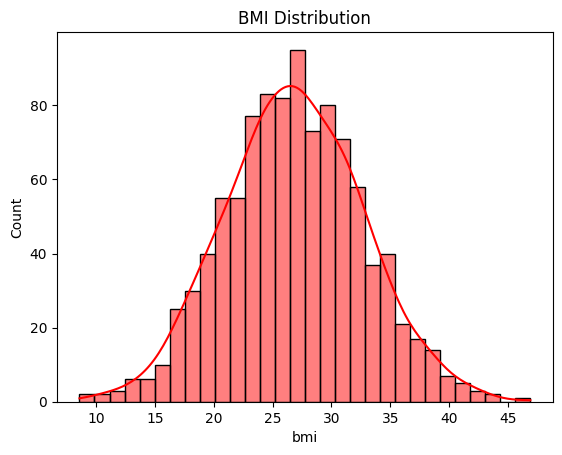

BMI Categories:
bmi_category
Overweight     330
Obese          301
Normal         291
Underweight     78
Name: count, dtype: int64


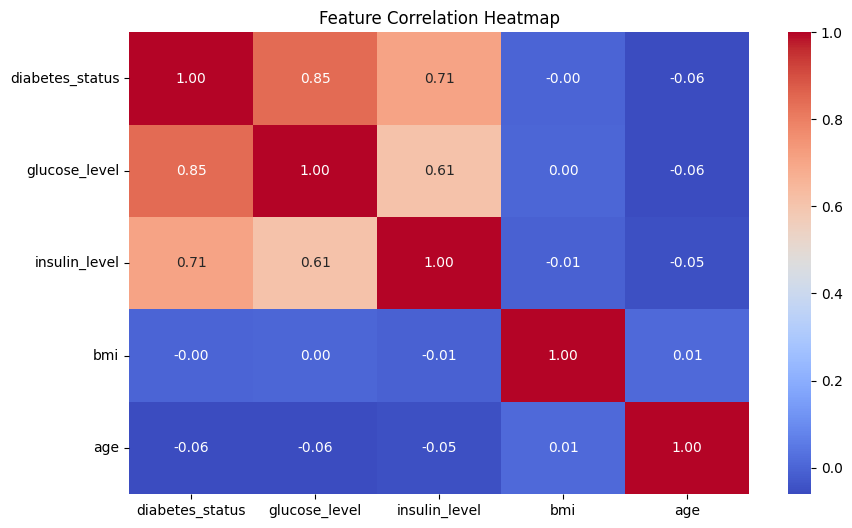

Feature Engineering Completed.
   diabetes_status diet_quality physical_activity_level  smoking_status  \
0                0         Good                Moderate  Current Smoker   
1                0         Good                    High  Current Smoker   
2                1         Good                    High      Non-Smoker   
3                1         Poor                     Low   Former Smoker   
4                0         Good                    High      Non-Smoker   

  family_history  glucose_level  insulin_level        bmi  age  \
0            Yes      81.512847       1.637218  29.918798   22   
1             No     107.371667      12.784553  30.160025   57   
2            Yes     141.782099      28.219859  25.802436   35   
3             No     186.950405      20.350001  36.065222   38   
4            Yes      77.492305      17.500545  20.303162   20   

              hba1c bmi_category age_group      age_bmi  
0  6.43464191221678        Obese     21-40   658.213547  
1    

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

data.info()
print("\nMissing Values:")
print(data.isnull().sum())

data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

numeric_cols = data.select_dtypes(include=[np.number]).columns
if not numeric_cols.empty:
    data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

print("Available columns:", data.columns)

features = [col for col in ['bmi', 'blood_glucose_level', 'hba1c_level'] if col in data.columns]
if features:
    plt.figure(figsize=(12, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, len(features), i)
        sns.boxplot(y=data[feature])
        plt.title(f'{feature} Boxplot')
    plt.tight_layout()
    plt.show()
else:
    print("No numeric features found for outlier detection.")

if 'age' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(data['age'], kde=True, bins=30, color='blue')
    plt.title('Age Distribution')
    plt.show()

if 'bmi' in data.columns:
    sns.histplot(data['bmi'], kde=True, bins=30, color='red')
    plt.title('BMI Distribution')
    plt.show()

if 'hba1c_level' in data.columns:
    sns.histplot(data['hba1c_level'], kde=True, bins=30, color='green')
    plt.title('HbA1c Level Distribution')
    plt.show()

if 'bmi' in data.columns:
    bins = [0, 18.5, 24.9, 29.9, 100]
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
    data['bmi_category'] = pd.cut(data['bmi'], bins=bins, labels=labels)
    print("BMI Categories:")
    print(data['bmi_category'].value_counts())

if not numeric_cols.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()

if 'gender' in data.columns and 'diabetes' in data.columns:
    sns.countplot(x='gender', hue='diabetes', data=data, palette='coolwarm')
    plt.title('Diabetes Prevalence by Gender')
    plt.show()

if 'smoking_history' in data.columns and 'diabetes' in data.columns:
    sns.countplot(x='smoking_history', hue='diabetes', data=data, palette='magma')
    plt.xticks(rotation=45)
    plt.title('Smoking History vs Diabetes')
    plt.show()

comorbidity_cols = [col for col in ['hypertension', 'heart_disease', 'diabetes'] if col in data.columns]
if len(comorbidity_cols) > 1:
    sns.heatmap(data[comorbidity_cols].corr(), annot=True, cmap='viridis', fmt='.2f')
    plt.title('Comorbidities Correlation with Diabetes')
    plt.show()

if 'age' in data.columns:
    data['age_group'] = pd.cut(data['age'], bins=[0, 20, 40, 60, 100], labels=['0-20', '21-40', '41-60', '61+'])

if all(col in data.columns for col in ['bmi', 'hba1c_level', 'blood_glucose_level']):
    data['risk_score'] = data['bmi'] * data['hba1c_level'] * data['blood_glucose_level']

if 'age' in data.columns and 'bmi' in data.columns:
    data['age_bmi'] = data['age'] * data['bmi']
if 'bmi' in data.columns and 'hba1c_level' in data.columns:
    data['bmi_hba1c'] = data['bmi'] * data['hba1c_level']

print("Feature Engineering Completed.")
print(data.head())